In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from numpy import array
from matplotlib import pyplot as plt
import scipy;
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
display(HTML("<style> div.prompt {display:none}</style>"))

In [2]:
# Import the dataset as dataframe

df = pd.read_csv("onlinefraud.csv", sep=",", names=["Step", "PaymentType", "Amount", "NameOrg", "OldBalanceOrg", "NewBalanceOrg", "NameDest", "OldBalanceDest", 
                                                     "NewBalanceDest", "IsFraud", "IsFlaggedFraud"], index_col=False, header=0)

In [3]:
# View top 5 rows of the dataset
df.head()

,Step,PaymentType,Amount,NameOrg,OldBalanceOrg,NewBalanceOrg,NameDest,OldBalanceDest,NewBalanceDest,IsFraud,IsFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Check number of observations and variables in dataset

df.shape

# There are 6362620 observations (rows) and 11 variables (columns).

(6362620, 11)

In [5]:
# Check datatype for all the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Step            int64  
 1   PaymentType     object 
 2   Amount          float64
 3   NameOrg         object 
 4   OldBalanceOrg   float64
 5   NewBalanceOrg   float64
 6   NameDest        object 
 7   OldBalanceDest  float64
 8   NewBalanceDest  float64
 9   IsFraud         int64  
 10  IsFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Use category data type for categorical column
df['PaymentType'] = df['PaymentType'].astype('category')

In [7]:
# Check summary statistics for all numeric variables
df.describe().round(2)

,Step,Amount,OldBalanceOrg,NewBalanceOrg,OldBalanceDest,NewBalanceDest,IsFraud,IsFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [8]:
# Check NA values in all the variables

print(df.isna().sum())

Step              0
PaymentType       0
Amount            0
NameOrg           0
OldBalanceOrg     0
NewBalanceOrg     0
NameDest          0
OldBalanceDest    0
NewBalanceDest    0
IsFraud           0
IsFlaggedFraud    0
dtype: int64


<Axes: xlabel='PaymentType', ylabel='count'>

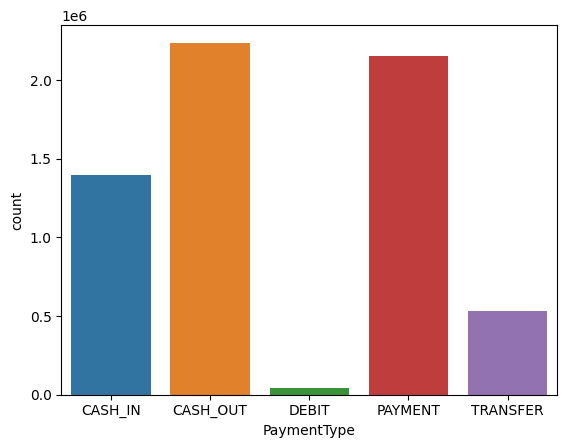

In [9]:
# Barplot for Payment Type
sns.countplot(x='PaymentType', data=df)

<Axes: xlabel='PaymentType', ylabel='Amount'>

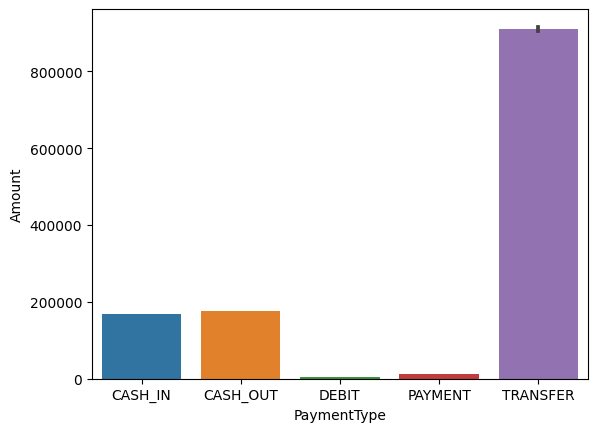

In [10]:
# Barplot for Amount vs Payment Type

sns.barplot(x='PaymentType', y='Amount', data=df)


Correlation Heatmap


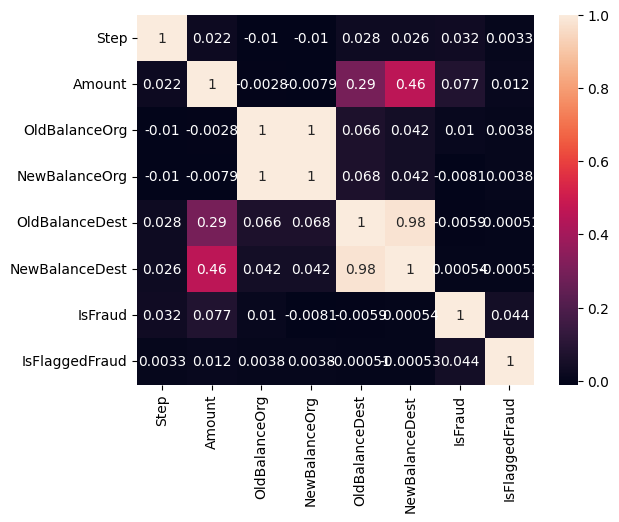

In [11]:
# Plot Correlation Heatmap
print("\nCorrelation Heatmap");

correlation_mat = df.corr()
plt.clf()
sns.heatmap(correlation_mat, annot = True)
plt.show()

corr = df.corr();

In [12]:
# Adding Payment Type values as variables

typeNew = pd.get_dummies(df['PaymentType'], drop_first=True)
dfNew = pd.concat([df, typeNew], axis=1)
dfNew.head()

,Step,PaymentType,Amount,NameOrg,OldBalanceOrg,NewBalanceOrg,NameDest,OldBalanceDest,NewBalanceDest,IsFraud,IsFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [13]:
# Rename variables

dfNew.rename(columns = {'CASH_OUT' : 'CashOut', 'DEBIT' : 'Debit', 'PAYMENT' : 'Payment', 'TRANSFER' : 'Transfer'}, inplace = True)
dfNew.head()

,Step,PaymentType,Amount,NameOrg,OldBalanceOrg,NewBalanceOrg,NameDest,OldBalanceDest,NewBalanceDest,IsFraud,IsFlaggedFraud,CashOut,Debit,Payment,Transfer
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [14]:
# Check if the dataset is balanced

response_count = dfNew.groupby("IsFraud")["IsFraud"].count();
print(response_count);
print("Percentage of 0s:", 100*response_count[0]/np.sum(response_count));
print("Percentage of 1s:", 100*response_count[1]/np.sum(response_count));

IsFraud
0    6354407
1       8213
Name: IsFraud, dtype: int64
Percentage of 0s: 99.87091795518198
Percentage of 1s: 0.12908204481801522


In [15]:
# Undersample the dataset

df_minority = df[(df['IsFraud']==1)]; 
df_majority = df[(df['IsFraud']==0)];

df_majority_downsampled = resample(df_majority, 
                                replace=False,    
                                n_samples= response_count[1], 
                                random_state=123); 

In [16]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority]);
response_count = df_downsampled.groupby("IsFraud")["IsFraud"].count();
print(response_count);

IsFraud
0    8213
1    8213
Name: IsFraud, dtype: int64


In [17]:
# Split X and Y

X = df_downsampled.drop(['IsFraud', 'PaymentType', 'NameOrg', 'NameDest', 'IsFlaggedFraud'], axis=1)
y = df_downsampled['IsFraud']

In [18]:
# Check X and Y shape

X.shape, y.shape

((16426, 6), (16426,))

In [19]:
# Create training and test dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

In [20]:
X.head()

,Step,Amount,OldBalanceOrg,NewBalanceOrg,OldBalanceDest,NewBalanceDest
5844077,402,3646.13,20532.0,16885.87,0.00,0.00
6359076,715,150708.06,2562.0,0.00,544897.92,695605.98
5554125,383,9738.36,0.0,0.00,0.00,0.00
6121974,540,1533.54,49852.0,48318.46,0.00,0.00
2434094,203,27865.80,0.0,0.00,0.00,0.00


In [21]:
# Logistic regression model

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

train_pred_LR = model_LR.predict_proba(X_train)[:, 1]

y_pred_LR = model_LR.predict_proba(X_test)[:, 1]

In [22]:
# Logistic Regression
print("Logistic Regression:")
confusion_LR = confusion_matrix(y_test, (y_pred_LR > 0.5).astype(int))
accuracy_LR = sum(np.diag(confusion_LR)) / sum(confusion_LR.flatten())
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))
r2_LR = r2_score(y_test, y_pred_LR)
print("Confusion Matrix:")
print(confusion_LR)
print("Accuracy:", accuracy_LR)
print("RMSE:", rmse_LR)
print("R-squared:", r2_LR)

Logistic Regression:
Confusion Matrix:
[[3115  193]
 [ 334 2929]]
Accuracy: 0.9197991173337392
RMSE: 0.2673003432586043
R-squared: 0.7141887017572237


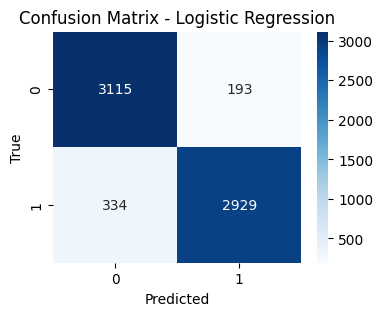

In [23]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_LR, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [24]:
# Random Forest Model

model_RF = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=42)
model_RF.fit(X_train, y_train)

train_pred_RF = model_RF.predict_proba(X_train)[:, 1]

y_pred_RF = model_RF.predict_proba(X_test)[:, 1]

In [25]:
print("Random Forest:")
confusion_RF = confusion_matrix(y_test, (y_pred_RF > 0.5).astype(int))
accuracy_RF = sum(np.diag(confusion_RF)) / sum(confusion_RF.flatten())
rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
r2_RF = r2_score(y_test, y_pred_RF)
print("Confusion Matrix:")
print(confusion_RF)
print("Accuracy:", accuracy_RF)
print("RMSE:", rmse_RF)
print("R-squared:", r2_RF)

Random Forest:
Confusion Matrix:
[[3245   63]
 [  39 3224]]
Accuracy: 0.9844772485162075
RMSE: 0.1164869431726565
R-squared: 0.9457206226413729


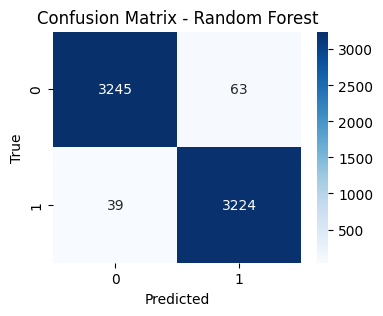

In [26]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_RF, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [27]:
# Create an MLP regressor with a single hidden layer of 15 neurons
model_MLP = MLPRegressor(hidden_layer_sizes=(15,), random_state=42)


param_grid = {
    'learning_rate_init': [0.01, 0.1]
}


grid_search = GridSearchCV(model_MLP, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_learning_rate = grid_search.best_params_['learning_rate_init']
best_model = grid_search.best_estimator_

y_pred_MLP = best_model.predict(X_test)

In [28]:
print("MLP:")
mlp_mod1_confusion = confusion_matrix(y_test, (y_pred_MLP > 0.5).astype(int))
mlp_mod1_accuracy = sum(np.diag(mlp_mod1_confusion)) / sum(mlp_mod1_confusion.flatten())
mlp_mod1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_MLP))
mlp_mod1_r2 = r2_score(y_test, y_pred_MLP)
print("Confusion Matrix:")
print(mlp_mod1_confusion)
print("Accuracy:", mlp_mod1_accuracy)
print("RMSE:", mlp_mod1_rmse)
print("R-squared:", mlp_mod1_r2)

MLP:
Confusion Matrix:
[[ 146 3162]
 [   2 3261]]
Accuracy: 0.5184903363262822
RMSE: 12.799656491254858
R-squared: -654.3555605915177


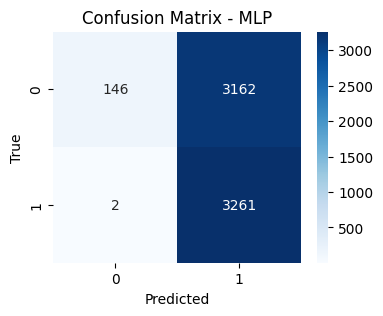

In [29]:
plt.figure(figsize=(4, 3))
sns.heatmap(mlp_mod1_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLP")
plt.show()